<a href="https://colab.research.google.com/github/nareekarn/All_project_in_class/blob/main/Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ชื่อ นรีกานต์
# นามสกุล ยันต์มงคล
# รหัสนักศึกษา 61070304

# Lab AI for Medicine : Breast Cancer Dataset
ข้อมูลชุดนี้เป็นหนึ่งในสามโดเมนที่จัดทำโดย Oncology Institute ซึ่งแสดงถึง การเกิดของมะเร็งเต้านม ที่มีการเกิดขึ้นกับคนไข้ในช่วงอายุต่าง ๆ  และคนไข้บางรายเมื่อปรากฎแล้ว มีการปรากฏซ้ำแล้วซ้ำอีกในเวชระเบียน ซึ่งการตรวจนี้เป็นผลจากการอ่านค่าข้อมูลจากเครื่องตรวจมะเร็งโดยดูจาก lymphography และ primary-tumor ด้วย

ชุดข้อมูลนี้ประกอบด้วย 286 เรคอร์ด แต่ละเรคอร์ดมี 10 แอตทริบิวต์ มีรายละเอียดดังนี้  

1. Class (การเกิดมะเร็ง): ไม่เกิดมะเร็งซ้ำ, เกิดมะเร็งซ้ำ 
2. Age (อายุ): 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99. 
3. Menopause (อาการวัยทอง): lt40 (เกิดหลังอายุ 40), ge40 (อาการวัยทองตามวัยขณะอายุ 40), premeno (อาการก่อนวัยทอง)
4. tumor-size (ขนาดของก้อนมะเร็งหน่วยเป็นมิลลิเมตร): 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59. 
5. inv-nodes (แพร่กระจายไปต่อมน้ำเหลืองกี่ต่อม): 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39. 
6. node-caps (มะเร็งมีการแพร่กระจายหรือไม่): yes, no. 
7. deg-malig (ระยะของมะเร็ง): 1, 2, 3. 
8. Breast (มะเร็งเต้านมข้าง): left, right. 
9. breast-quad (ตำแหน่งของมะเร็งในเต้านม): left-up, left-low, right-up, right-low, central. 
10. Irradiat (ได้รับการฉายรังสีหรือไม่): yes, no.


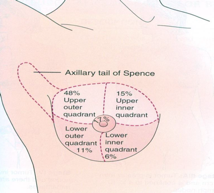

#รายละเอียดของข้อมูล (รหัสที่ทำการแปลงจากข้อมูลต้นฉบับ ซึ่งข้อมูลต้นฉบับมีทั้งตัวเลขและตัวอักษร)

1.    Age         
     20-29          (1)
     30-39          (2)
     40-49	        (3)
     50-59	        (4)
     60-69	        (5)
     70-79	        (6)

2.   Menopaue     
      premeno	     (1)
      ge40	       (2)
      lt40         (3)

3.   Tumor-Size   
       0-4	       (1)
      15-19	       (2)
      20-24	       (3)
      25-29	       (4)
      30-34	       (5)
      35-39	       (6)
      40-44	       (7)
      45-49	       (8)
      50-54	       (9)

4.   Inv-nodes    
       0-2        	(1)   
       15-17	      (2)
       18-20	      (3)
       21-23      	(4)
       24-26	      (5)

5.   Node-caps     
        no	        (0)
        yes	        (1)

6.   Deg-malig     
      grade1	      (1)
      grade2      	(2)
      grade3	      (3)

7.   Breast side   
      right	        (1)
      left	        (2)

8.   Breast-quad   
      right_up	    (1)
      right_low	    (2)
      central	      (3)
      left_up	      (4)
      left_low    	(5)

9.   Irradiat      
        no         	(0)
        yes	        (1) 
10.   Class        
no-recurrence-events	(0)
recurrence-events	    (1)


# วัตถุประสงค์

โครงการนี้มีวัตถุประสงค์เพื่อช่วยให้ผู้เชี่ยวชาญด้านสุขภาพทำการวินิจฉัยได้ง่ายขึ้นโดยใช้เทคนิค Machine Learning เพื่อเป็นการเชื่อมกันระหว่างความรู้กับชุดข้อมูลที่ทำการบันทึกไว้สามารถนำไปใช้ประโยขน์ได้ ดังนั้นในการทดลองนี้เราจะนำเทคนิค Machine learning มาประยุกต์ใช้กับชุดข้อมูลโรคมะเร็งเต้านม 
และสามารถแนะนำผู้ป่วยได้ถึงการเกิดโรค ความเสี่ยงของการเกิดโรคมะเร็งเต้านม และรายละเอียดต่าง ๆ ของโรค

# ทุกการทดลอง ให้นักศึกษาทำการ Training 80% Testing 20%  พร้อมการวิเคราะห์ข้อมูล

Import and Loading Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import  MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split

ใช้ข้อมูล
breast-cancer_Original.csv


In [ ]:
df = pd.read_csv('breast-cancer_Original.csv')

In [ ]:
df

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no,no-recurrence-events
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes,no-recurrence-events
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no,no-recurrence-events
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events


# Check Null Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          277 non-null    int64  
 1   menopause    277 non-null    int64  
 2   tumor-size   277 non-null    int64  
 3   inv-nodes    277 non-null    int64  
 4   node-caps    277 non-null    float64
 5   deg-malig    277 non-null    int64  
 6   breast       277 non-null    int64  
 7   breast-quad  277 non-null    float64
 8   irradiat     277 non-null    int64  
 9   Class        277 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 23.8 KB


# ตรวจสอบข้อมูลเพื่อจัดการ Missing Data

In [ ]:
for i in df:
  print(df[i].value_counts())

4    91
3    89
5    55
2    36
6     5
1     1
Name: age, dtype: int64
1    149
2    123
3      5
Name: menopause, dtype: int64
7     57
6     51
5     48
4     29
3     28
9     22
8     19
11     8
1      8
2      4
10     3
Name: tumor-size, dtype: int64
1    209
2     34
3     17
4      7
6      6
5      3
9      1
Name: inv-nodes, dtype: int64
0.0    221
1.0     56
Name: node-caps, dtype: int64
2    129
3     82
1     66
Name: deg-malig, dtype: int64
2    145
1    132
Name: breast, dtype: int64
5.0    106
4.0     94
1.0     33
2.0     23
3.0     21
Name: breast-quad, dtype: int64
0    215
1     62
Name: irradiat, dtype: int64
0    196
1     81
Name: Class, dtype: int64


เปลี่ยนค่าในคอลัมน์ให้เป็นกลุ่มตัวเลข

In [ ]:
def repl(col, val):
  for co in col:
    for lop in range(len(val)):
      df[col] = df[col].replace(val[lop], lop+1)

In [ ]:
def replbool(col, val):
  for co in col:
    for lop in range(len(val)):
      df[col] = df[col].replace(val[lop], lop)

In [ ]:
col = df.columns.values.tolist()
val_age = ['20-29', '30-39', '40-49','50-59', '60-69', '70-79']
val_menopause = ['premeno', 'ge40', 'lt40']
val_Tumor = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54']
val_Inv = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23', '24-26', '27-29', '30-32', '33-35', '36-39']
val_Deg = ['grade1', 'grade2', 'grade3']
val_BreastS = ['right', 'left']
val_BreastQ = ['right_up', 'right_low', 'central', 'left_up', 'left_low']
val_caps = ['no', 'yes']
val_Irradiat  = ['no', 'yes']
val_class = ['no-recurrence-events', 'recurrence-events']

In [ ]:
repl(col, val_age)
repl(col, val_menopause)
repl(col, val_Tumor)
repl(col, val_Inv)
repl(col, val_Deg)
repl(col, val_BreastS)
repl(col, val_BreastQ)
replbool(col, val_caps)
replbool(col, val_Irradiat)
replbool(col, val_class)



In [ ]:
df

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,3,1,4,1,1.0,3,1,4.0,0,1
1,4,2,4,1,0.0,1,1,3.0,0,0
2,4,2,8,1,0.0,2,2,5.0,0,1
3,3,1,8,1,1.0,3,1,5.0,1,0
4,3,1,7,2,1.0,2,2,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...
281,4,2,7,3,1.0,2,2,5.0,0,0
282,4,1,6,2,1.0,2,2,5.0,1,0
283,2,1,7,3,1.0,2,1,1.0,0,0
284,4,1,4,1,0.0,2,1,5.0,0,0


In [ ]:
for i in df:
  print(df[i].value_counts())

4    91
3    89
5    55
2    36
6     5
1     1
Name: age, dtype: int64
1    149
2    123
3      5
Name: menopause, dtype: int64
7     57
6     51
5     48
4     29
3     28
9     22
8     19
11     8
1      8
2      4
10     3
Name: tumor-size, dtype: int64
1    209
2     34
3     17
4      7
6      6
5      3
9      1
Name: inv-nodes, dtype: int64
0.0    221
1.0     56
Name: node-caps, dtype: int64
2    129
3     82
1     66
Name: deg-malig, dtype: int64
2    145
1    132
Name: breast, dtype: int64
5.0    106
4.0     94
1.0     33
2.0     23
3.0     21
Name: breast-quad, dtype: int64
0    215
1     62
Name: irradiat, dtype: int64
0    196
1     81
Name: Class, dtype: int64


# แสดง Attribute Distribution

เนื่องจากข้อมูลทุกคอลัมน์เป็นข้อมูลประเภทกลุ่มไปแล้วการใช้กราฟแท่งในการแสดงข้อมูลจึงเป็นกราาฟที่เหมาะสมที่สุด

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec0a2d55c0>,
      dtype=object)

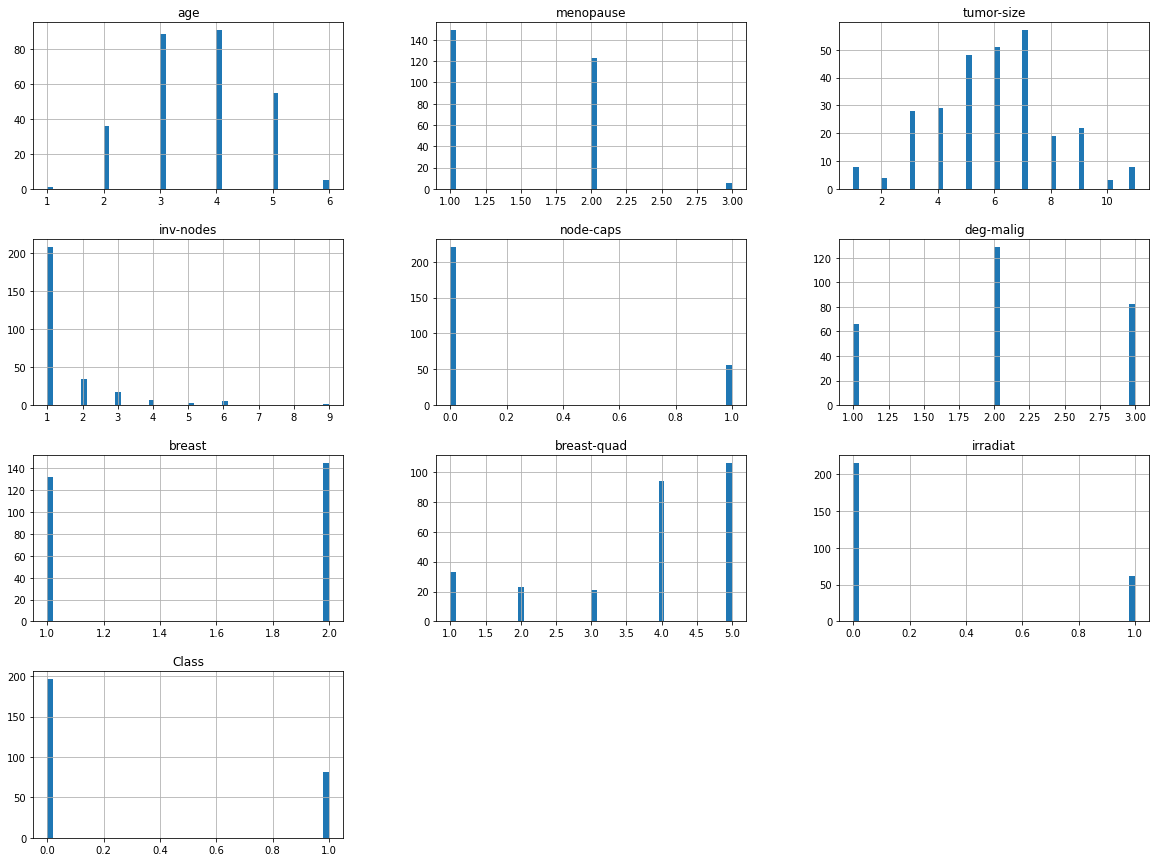

In [ ]:
df.hist(bins=50,figsize=(20,15))

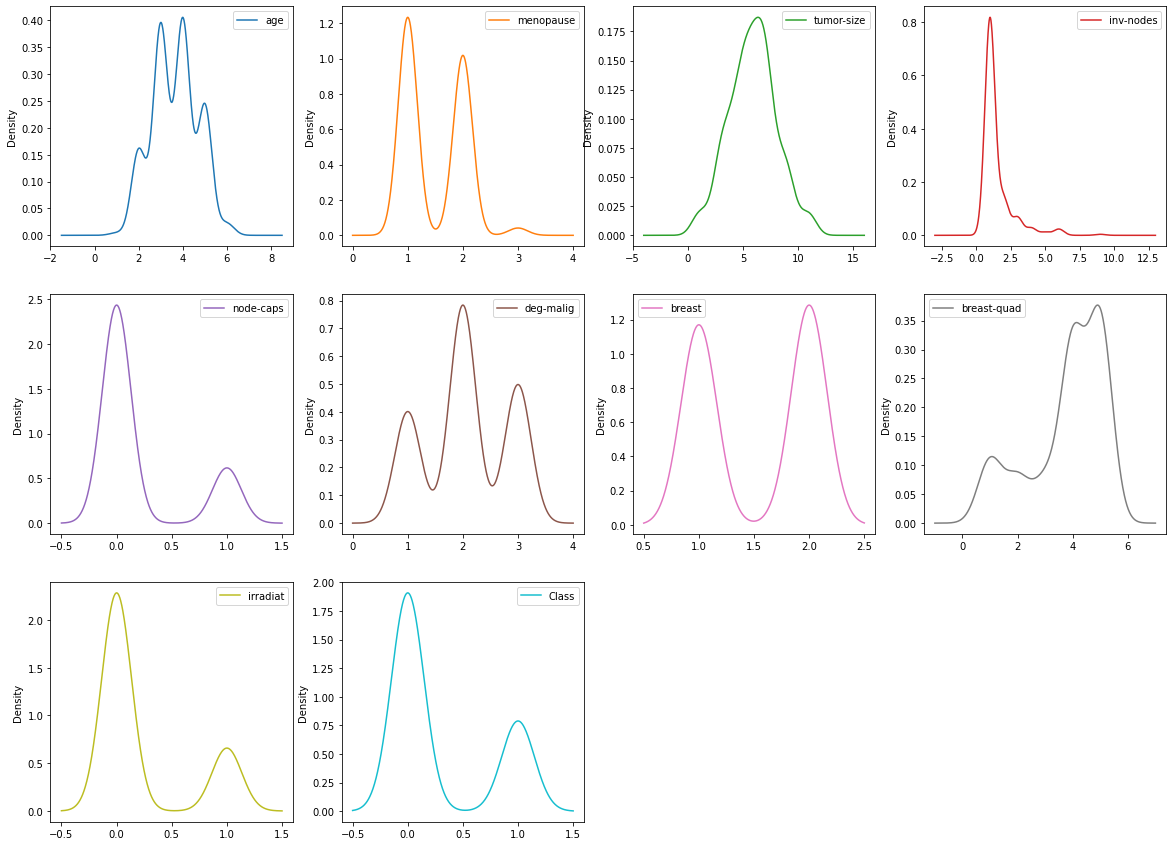

In [ ]:
df.plot(kind='density', subplots=True, layout=(3,4),figsize=(20,15), sharex=False)
plt.show()

ข้อมูลบางกราฟที่เป็นค่าOutlier ไม่ใช่ค่าOutlier ที่แท้จริงแต่เป็นค่าของอีกกลุ่มหนึ่ง

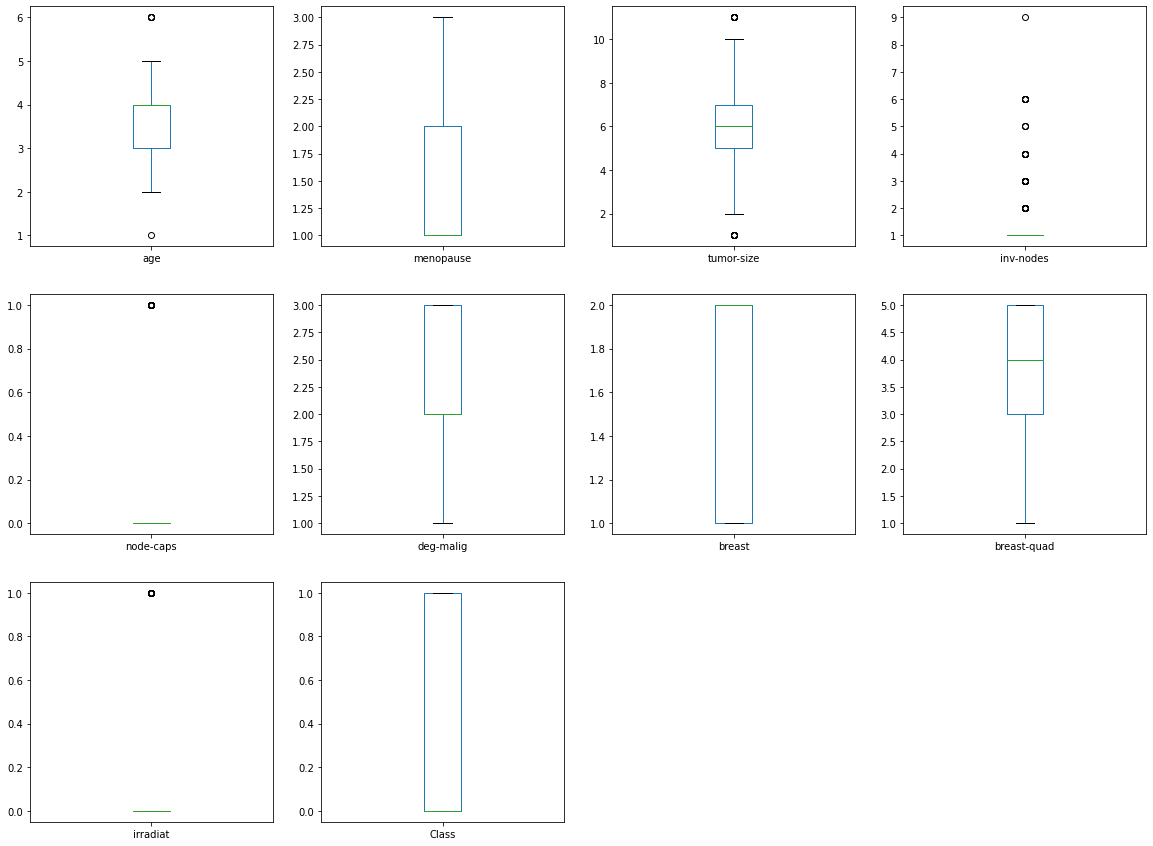

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,4),figsize=(20,15), sharex=False)
plt.show()

# หา Correlation ของ Attribute

ข้อมูลในแต่ละ feature มีลักษณะเป็นกลุ่ม หรือ Categorical โดยมี label หรือ "Class" มีลักษณะเป็นกลุ่ม หรือ Categorical เช่นกัน ดังนั้นการหาความสัมพันธ์หรือ Correlation ของ Attribute ควรที่จะใช้ Chi-Square มากกว่า เพราะกลุ่มที่แบ่งออกมาเป็นเลขในแต่คอลัมน์ ค่ากลุ่ม 1 ไม่ได้มีค่าน้อยกว่ากลุ่ม 2 จึงไม่สามารถวัดได้ว่าปริมาณที่เพิ่มขึ้นส่งผลต่อ Classจริงหรือไม่ จึงไม่ควรใช้ pearson, spearman และkendallในการวัดค่าความสัมพันธ์

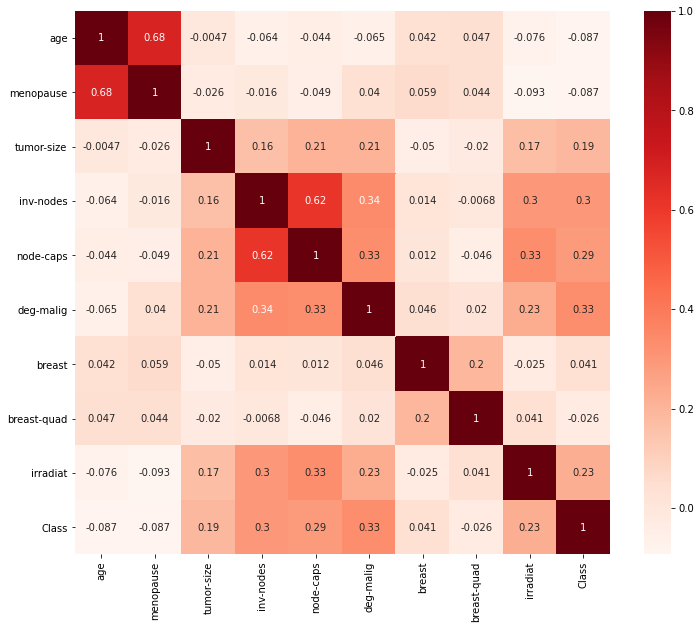

In [ ]:
cor = df.corr(method='pearson') #ควรใช้กับระหว่าง quantitive และ quantitive
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

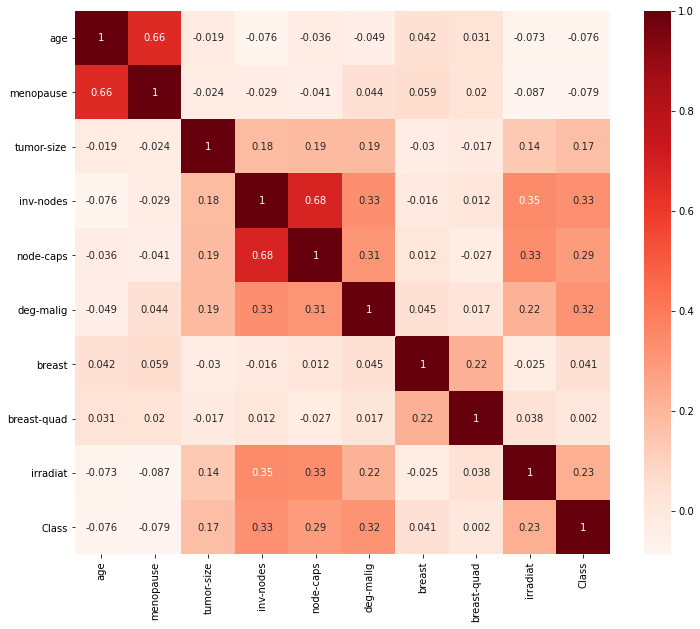

In [ ]:
cor = df.corr(method='kendall') #ใช้เมื่อfeatureเป็น quantitive กับ categorical หรือ ระหว่าง quantitive และ quantitive
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
for cou in col:
  x = df[cou].astype(str)
  y = df['Class'].astype(str)
  chi2, p, dof, ex = stats.chi2_contingency(pd.crosstab(x, y))
  print(cou,end=" chi : ")
  print(chi2)

age chi : 6.419782577885648
menopause chi : 3.048789829312711
tumor-size chi : 19.000311139854354
inv-nodes chi : 33.58021883048385
node-caps chi : 21.580777107597214
deg-malig chi : 34.936090274426135
breast chi : 0.3082451013707853
breast-quad chi : 3.310302354039875
irradiat chi : 12.983499178129758
Class chi : 272.18806289516783


# Feature Selection Method

ใช้ความสัมพันธ์ระหว่างคอลัมน์ในการเลือกด้วยการคิด chi-square ถ้า p-values< alpha featureนั้นมีความสำคัญกับโมเดล 

In [ ]:
features_col = []
for cou in col:
  x = df[cou].astype(str)
  y = df['Class'].astype(str)
  chi2, p, dof, ex = stats.chi2_contingency(pd.crosstab(x, y))
  if p < 0.05 and cou != 'Class':
    result = cou + "is Important for Prediction"
    print(result)
    features_col.append(cou)
features_col

tumor-sizeis Important for Prediction
inv-nodesis Important for Prediction
node-capsis Important for Prediction
deg-maligis Important for Prediction
irradiatis Important for Prediction


['tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'irradiat']

In [ ]:
X = df[features_col]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Logistic Regression Method

In [ ]:
lg = LogisticRegression()
lg_model = lg.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        36
           1       0.73      0.40      0.52        20

    accuracy                           0.73        56
   macro avg       0.73      0.66      0.67        56
weighted avg       0.73      0.73      0.71        56



In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[33,  3],
       [12,  8]])

In [ ]:
FN = confusion_mat[1][0]
TP = confusion_mat[1][1]
print('FNs : %.4f%%'%((FN/(TP+FN))*100))

FNs : 60.0000%


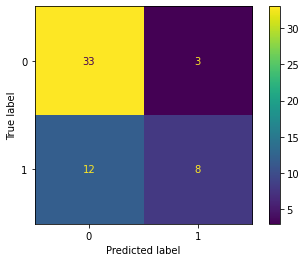

In [ ]:
#0ไม่เกิดซ้ำ 1เกิดซ้ำ
plot_confusion_matrix(lg_model, X_test, y_test)
plt.show()

ค่า FN = 12 แสดงว่ามีคนที่มีโอกาสเกิดโรคมะเร็งซ้ำแต่ ทายว่าไม่เกิดซ้ำอยู่ 12 คน

# k-NN 


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        36
           1       0.62      0.50      0.56        20

    accuracy                           0.71        56
   macro avg       0.69      0.67      0.67        56
weighted avg       0.71      0.71      0.71        56



Confustion Matrix

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred_knn)
confusion_mat

array([[30,  6],
       [10, 10]])

In [ ]:
FN = confusion_mat[1][0]
TP = confusion_mat[1][1]
print('FNs : %.4f%%'%((FN/(TP+FN))*100))

FNs : 50.0000%


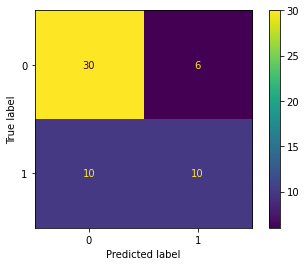

In [ ]:
#0ไม่เกิดซ้ำ 1เกิดซ้ำ
plot_confusion_matrix(knn, X_test, y_test)
plt.show()

ค่า FN = 10 แสดงว่ามีคนที่มีโอกาสเกิดโรคมะเร็งซ้ำแต่ ทายว่าไม่เกิดซ้ำอยู่ 10 คน

# SVM Method
Training 80% Testing 20%  
พร้อมการวิเคราะห์ข้อมูล

In [ ]:
svm_model = svm.SVC(C=2, gamma='scale', kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.65      0.94      0.77        36
           1       0.50      0.10      0.17        20

    accuracy                           0.64        56
   macro avg       0.58      0.52      0.47        56
weighted avg       0.60      0.64      0.56        56



Confusion Matrix

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred_svm)
confusion_mat

array([[34,  2],
       [18,  2]])

In [ ]:
FN = confusion_mat[1][0]
TP = confusion_mat[1][1]
print('FNs : %.4f%%'%((FN/(TP+FN))*100))

FNs : 90.0000%


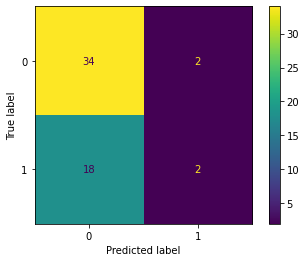

In [ ]:
#0ไม่เกิดซ้ำ 1เกิดซ้ำ
plot_confusion_matrix(svm_model, X_test, y_test)
plt.show()

ค่า FN = 18 แสดงว่ามีคนที่มีโอกาสเกิดโรคมะเร็งซ้ำแต่ ทายว่าไม่เกิดซ้ำอยู่ 18 คน

# Decision Tree Method

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        36
           1       0.77      0.50      0.61        20

    accuracy                           0.77        56
   macro avg       0.77      0.71      0.72        56
weighted avg       0.77      0.77      0.75        56



Confustion Matrix

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred_dt)
confusion_mat

array([[33,  3],
       [10, 10]])

In [ ]:
FN = confusion_mat[1][0]
TP = confusion_mat[1][1]
print('FNs : %.4f%%'%((FN/(TP+FN))*100))

FNs : 50.0000%


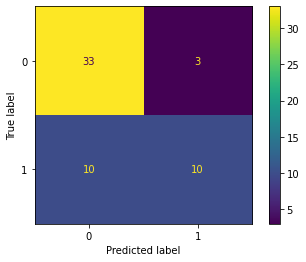

In [ ]:
#0ไม่เกิดซ้ำ 1เกิดซ้ำ
plot_confusion_matrix(dt, X_test, y_test)
plt.show()

ค่า FN = 10 แสดงว่ามีคนที่มีโอกาสเกิดโรคมะเร็งซ้ำแต่ ทายว่าไม่เกิดซ้ำอยู่ 10 คน

# Neural Network (NN) Method


In [ ]:
nn = MLPClassifier(random_state=3, max_iter=400)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        36
           1       0.77      0.50      0.61        20

    accuracy                           0.77        56
   macro avg       0.77      0.71      0.72        56
weighted avg       0.77      0.77      0.75        56



Confustion Matrix

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred_nn)
confusion_mat

array([[33,  3],
       [10, 10]])

In [ ]:
FN = confusion_mat[1][0]
TP = confusion_mat[1][1]
print('FNs : %.4f%%'%((FN/(TP+FN))*100))

FNs : 50.0000%


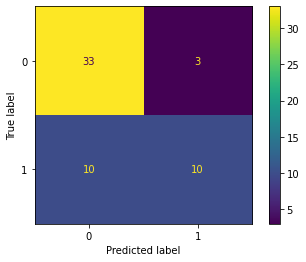

In [ ]:
#0ไม่เกิดซ้ำ 1เกิดซ้ำ
plot_confusion_matrix(nn, X_test, y_test)
plt.show()

ค่า FN = 10 แสดงว่ามีคนที่มีโอกาสเกิดโรคมะเร็งซ้ำแต่ ทายว่าไม่เกิดซ้ำอยู่ 10 คน

**เมื่อดูที่ค่าค่าการทำนายผิด FNs** 
> จะพบว่าโมเดลที่สามารถทำนายความถูกต้องของโรคได้ดีที่สุด คือ
 Neural Network (NN) Method, Decision Tree Method และ k-NN โดย 
1.   Neural Network (NN) Method, Decision Tree Method และ k-NN มีค่าFNs อยู่ที่ 50%
2.   Logistic Regression Method ค่า FNs = 60%
3.   SVM Method FNs = 90%

**และเมื่อดูที่ค่า Accuracy**

> จะพบว่าโมเดลที่มีค่า Accuracy สูงที่สุดคือ
1.   Neural Network (NN) Method และ Decision Tree Method ที่ 77%
2.   Logistic Regression Method ที่ 73%
3.   k-NN ที่ 71%
4.   SVM Method ที่ 64%

**สรุป**


> โมเดลที่เหมาะสำหรับข้อมูลการทำนายโรคมะเร็ง คือ โมเดล Neural Network (NN) Method และ Decision Tree Method









# Reference

Michalski,R.S., Mozetic,I., Hong,J., & Lavrac,N. (1986). The Multi-Purpose Incremental Learning System AQ15 and its Testing Application to Three Medical Domains. In Proceedings of the Fifth National Conference on Artificial Intelligence, 1041-1045, Philadelphia, PA: Morgan Kaufmann.


Clark,P. & Niblett,T. (1987). Induction in Noisy Domains. In Progress in Machine Learning (from the Proceedings of the 2nd European Working Session on Learning), 11-30, Bled, Yugoslavia: Sigma Press.

Tan, M., & Eshelman, L. (1988). Using weighted networks to represent classification knowledge in noisy domains. Proceedings of the Fifth International Conference on Machine Learning, 121-134, Ann Arbor, MI.


Cestnik,G., Konenenko,I, & Bratko,I. (1987). Assistant-86: A Knowledge-Elicitation Tool for Sophisticated Users. In I.Bratko & N.Lavrac (Eds.) Progress in Machine Learning, 31-45, Sigma Press.

# END